# Optimizer Comparison Exercise
## Objective
Explore how different optimization algorithms affect the training of neural networks.

## Background
Optimizers are algorithms or methods used to change the attributes of the neural network, such as weights and learning rate, to reduce the losses. Common optimizers include SGD (Stochastic Gradient Descent), Mini-batch SGD, Momentum, Adam, and RMSProp.


# Part 1: Classification task

## Setup
Start by importing necessary libraries and preparing a simple dataset.

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [40]:
# Load or create a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(800, 20)
(800,)
(200, 20)
(200,)


## Building the Neural Network
Define a function to create a basic neural network. This function will take an optimizer as an argument. Define the network yourself with 2 hidden layers using 64 nodes each. They should both use relu as activation function. Dont forget the output layer which, for a binary classification problem should use what activation function?


In [46]:
def build_model(optimizer):
    # Add your model here following the above instructions.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(20,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


## Experimentation
Experiment with different optimizers. For each optimizer, train the model and plot its accuracy and loss.

### Task:
1. Try the following optimizers: 'sgd', 'adam', 'rmsprop', and a custom SGD with Momentum.
2. For the custom SGD with Momentum, use: tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
3. Train each model for a fixed number of epochs (e.g., 30) and evaluate its performance on the test set.
4. Do step 1-3 same, but change batch size.

In [202]:
# Some terrible fucking code below

batch_sizes = [i for i in range(0, 110, 10)]
optimizers = ['sgd', 'SGD_momentum', 'adagrad', 'rmsprop', 'adam']
histories = {}


for batch_size in batch_sizes:
    model_metadata = []
    
    for opt in optimizers:
        print(f"Training with optimizer: {opt}, batch size: {batch_size}")
        
        if opt == "SGD_momentum": 
            model = build_model(tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9))
        else:
            model = build_model(opt)
        
        # We manually specify the validation data
        history = model.fit(X_train, y_train, epochs=30, batch_size=None, validation_data=(X_test, y_test), verbose=0)
        
        model_metadata.append({
            'optimizer': opt,
            'history': history
        })
        
    histories[batch_size] = model_metadata

Training with optimizer: sgd, batch size: 0


Training with optimizer: SGD_momentum, batch size: 0
Training with optimizer: adagrad, batch size: 0
Training with optimizer: rmsprop, batch size: 0
Training with optimizer: adam, batch size: 0
Training with optimizer: sgd, batch size: 10
Training with optimizer: SGD_momentum, batch size: 10
Training with optimizer: adagrad, batch size: 10
Training with optimizer: rmsprop, batch size: 10
Training with optimizer: adam, batch size: 10
Training with optimizer: sgd, batch size: 20
Training with optimizer: SGD_momentum, batch size: 20
Training with optimizer: adagrad, batch size: 20
Training with optimizer: rmsprop, batch size: 20
Training with optimizer: adam, batch size: 20
Training with optimizer: sgd, batch size: 30
Training with optimizer: SGD_momentum, batch size: 30
Training with optimizer: adagrad, batch size: 30
Training with optimizer: rmsprop, batch size: 30
Training with optimizer: adam, batch size: 30
Training with optimizer: sgd, batch size: 40
Training with optimizer: SGD_mom

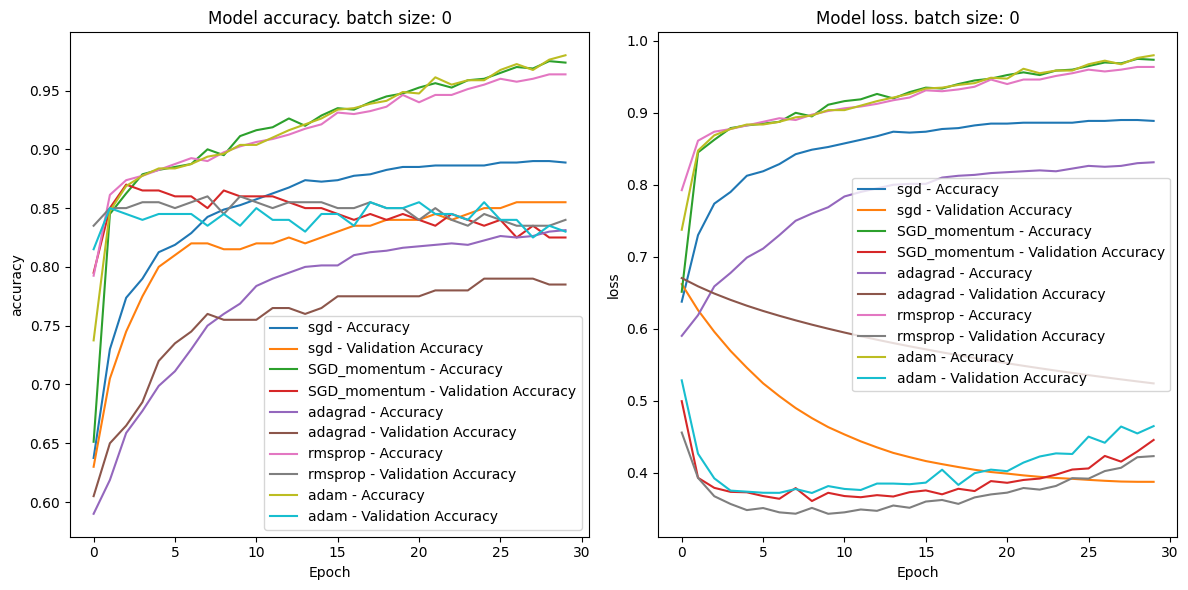

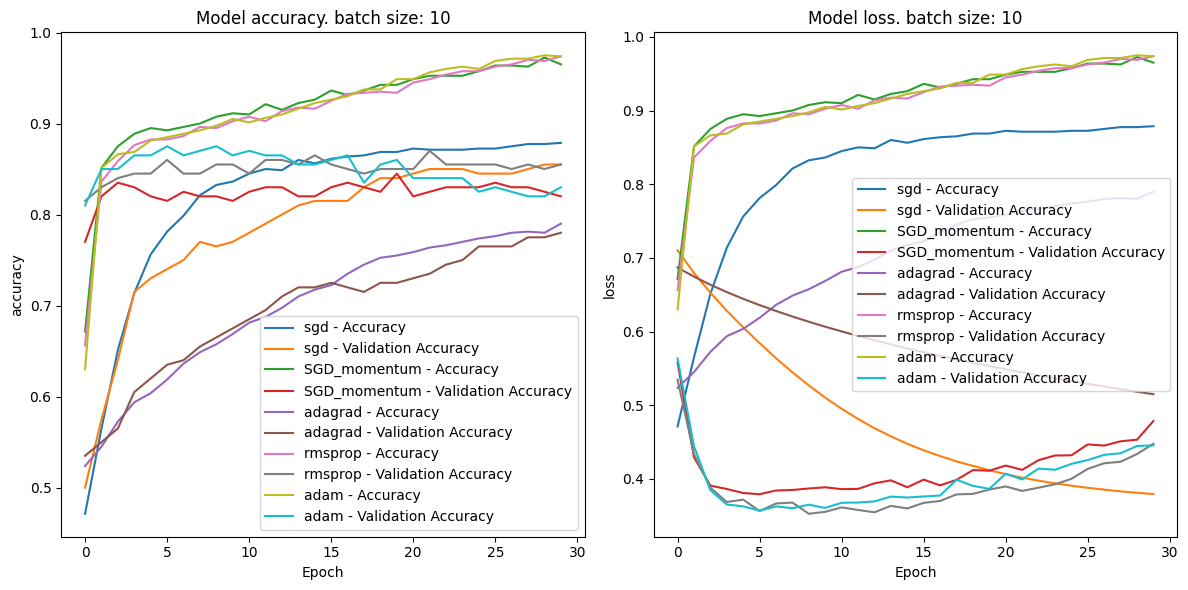

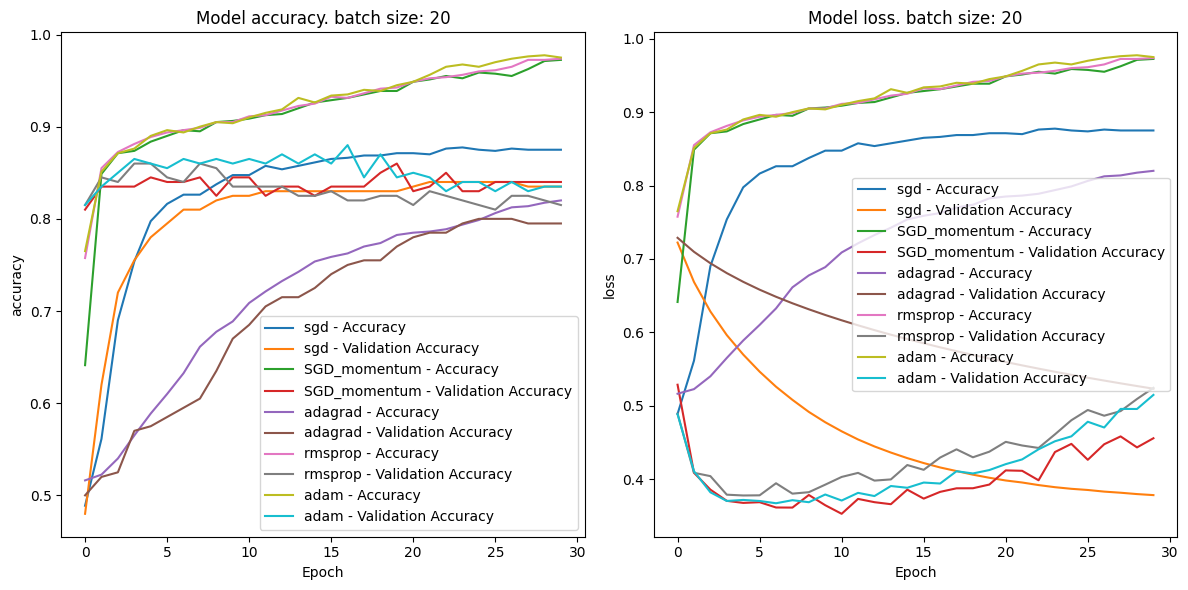

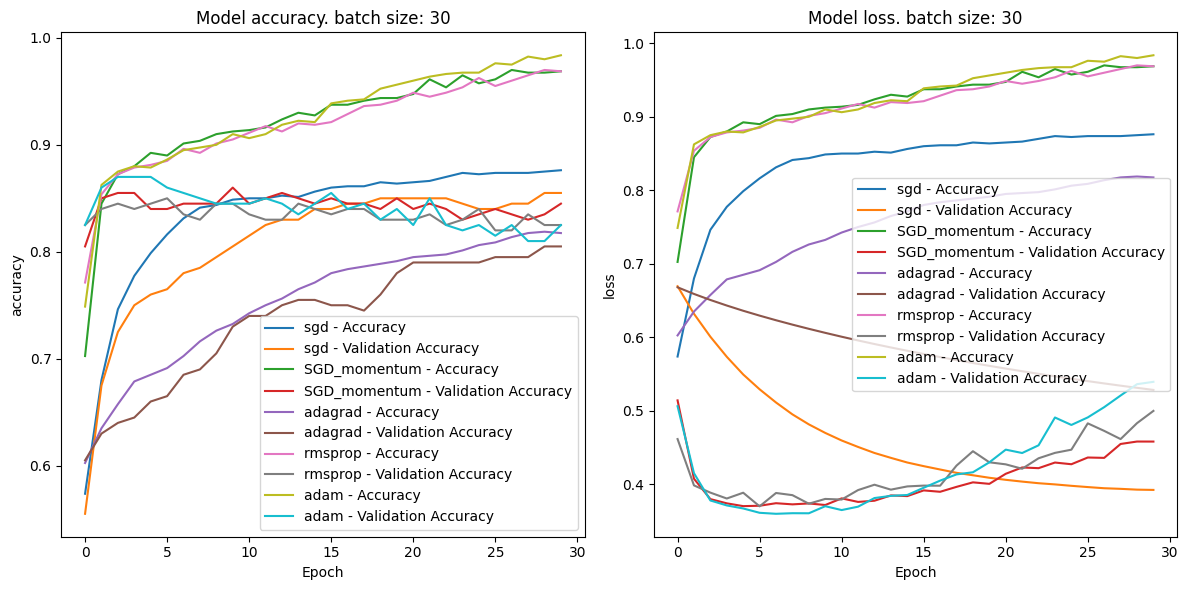

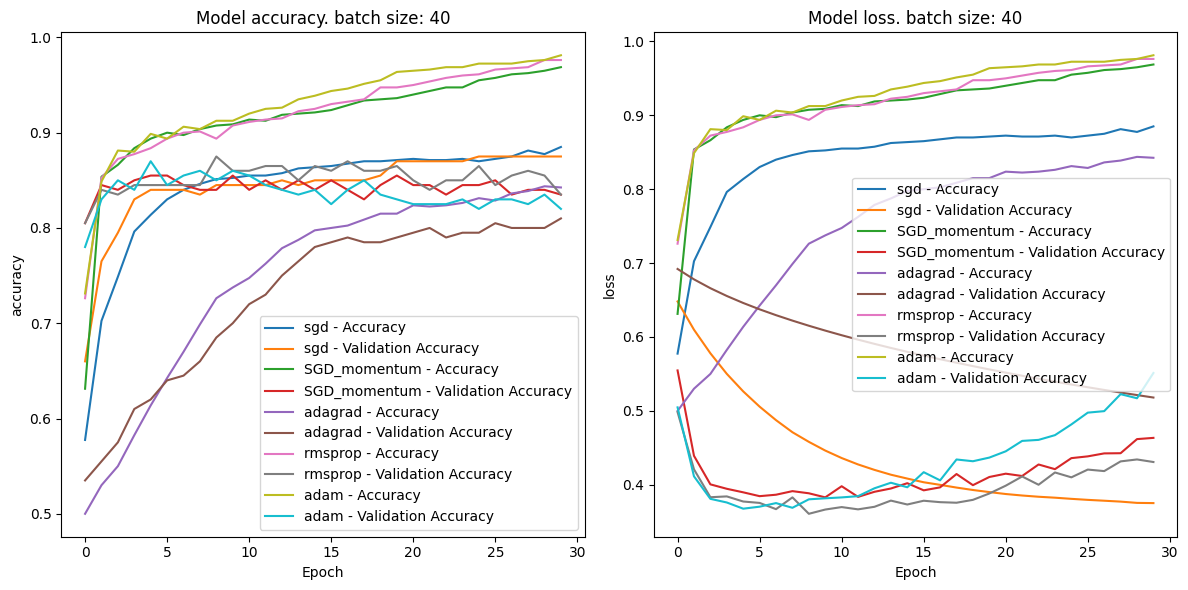

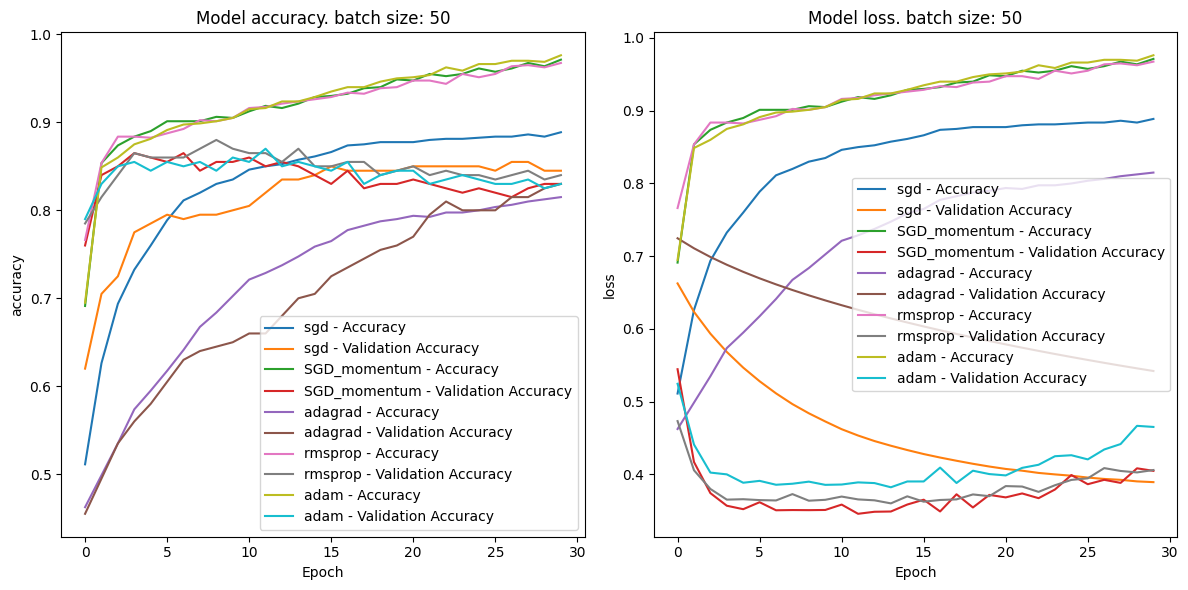

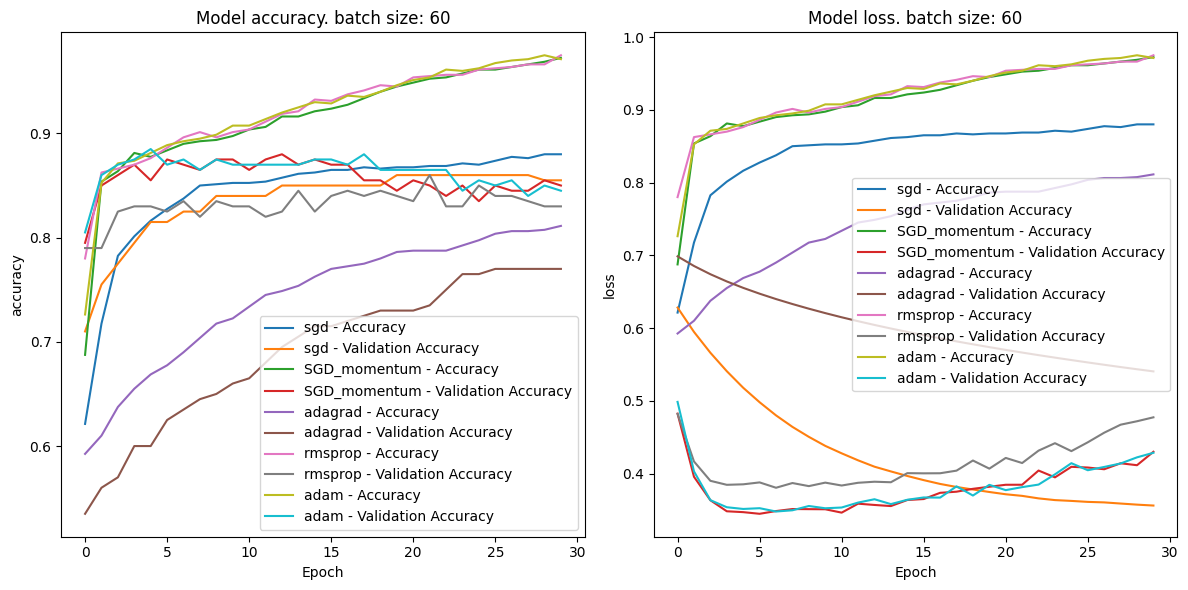

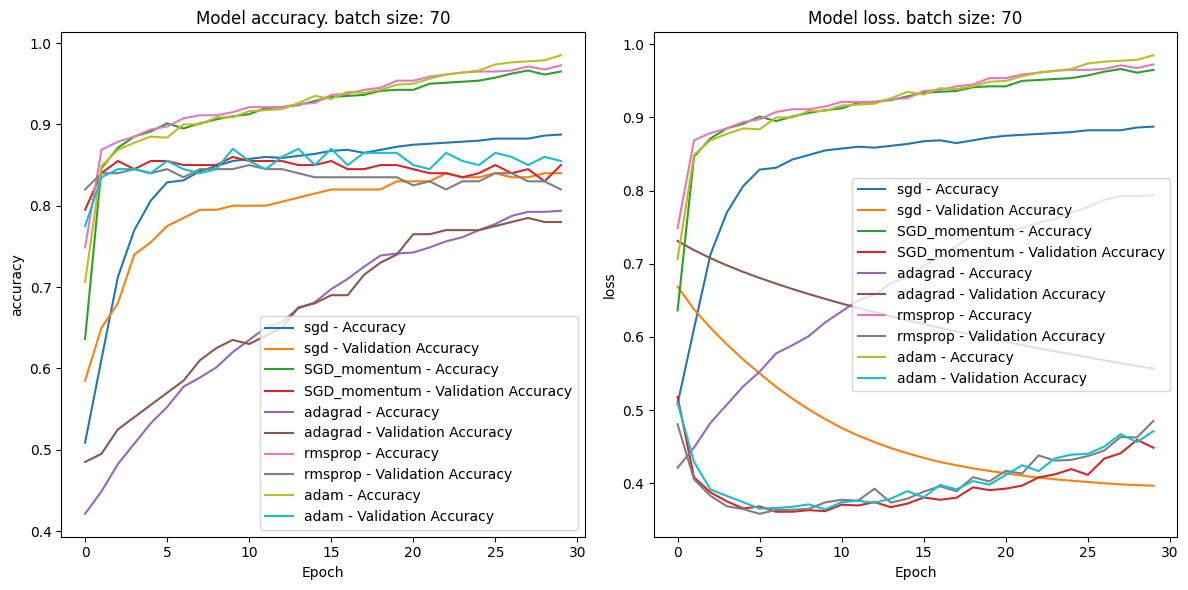

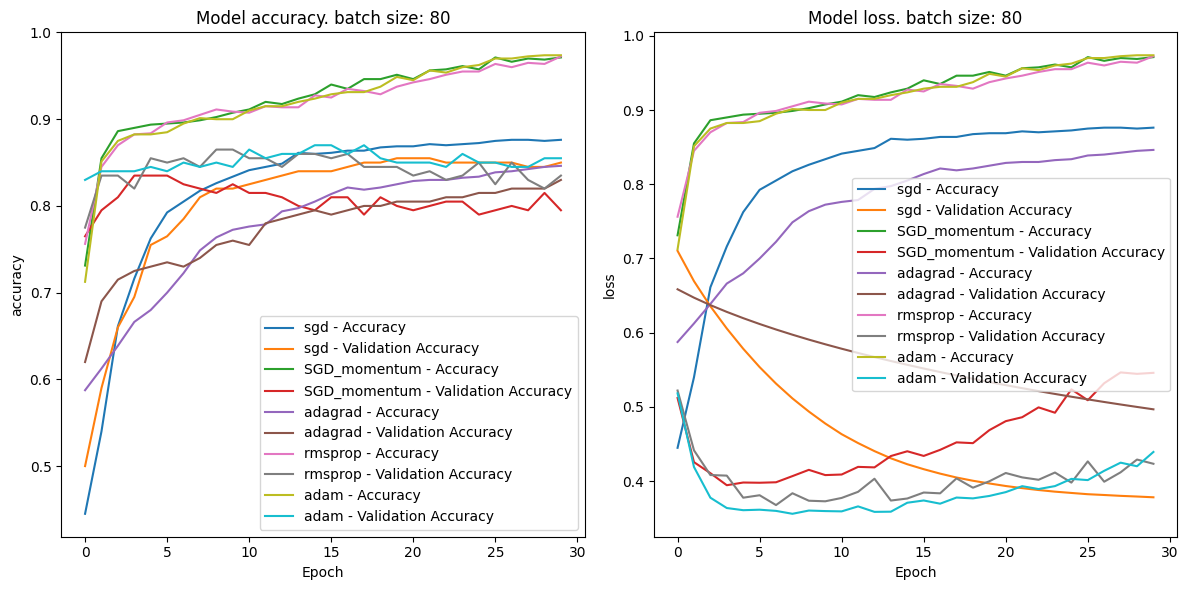

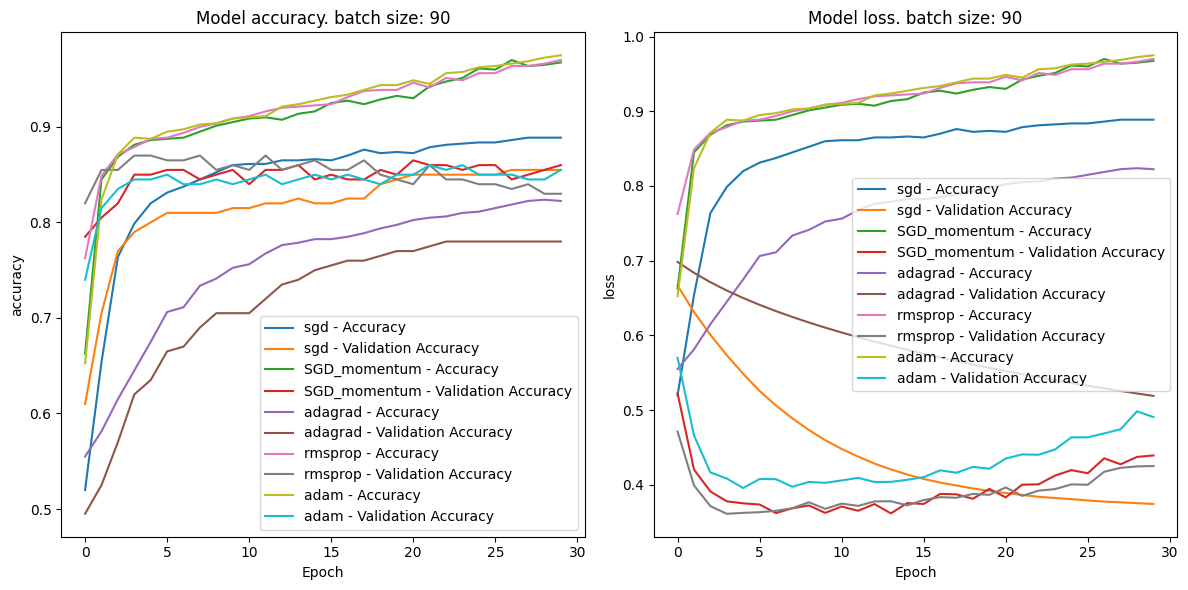

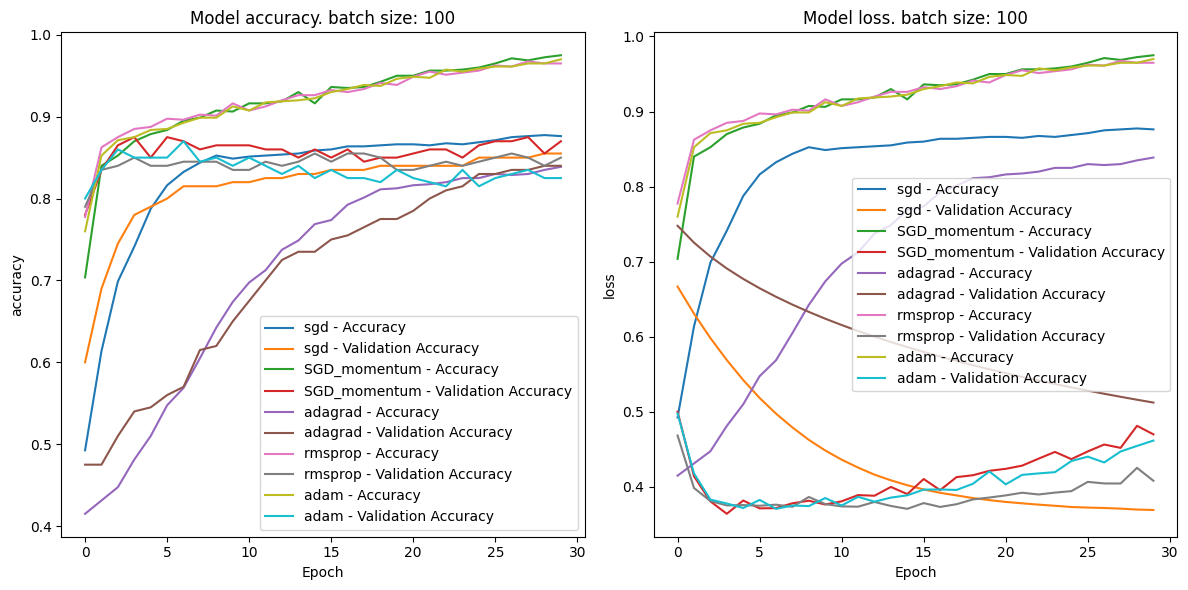

In [204]:
# Even more terrible code

history_parameters = ['accuracy', 'loss']

for batch_size, metadatas in histories.items():
    plt.figure(figsize=(12, 6))
    
    for i, history_parameter in enumerate(history_parameters, 1):
        plt.subplot(1, 2, i)

        for metadata in metadatas:
            plt.plot(metadata['history'].history['accuracy'], label=f'{metadata["optimizer"]} - Accuracy')
            plt.plot(metadata['history'].history[f"val_{history_parameter}"], label=f'{metadata["optimizer"]} - Validation Accuracy')

        plt.title(f'Model {history_parameter}. batch size: {batch_size}')
        plt.ylabel(history_parameter)
        plt.xlabel('Epoch')
        plt.legend()
        
    plt.tight_layout()
    plt.show()

## Visualization
Plot the training and validation accuracy and loss for each optimizer.

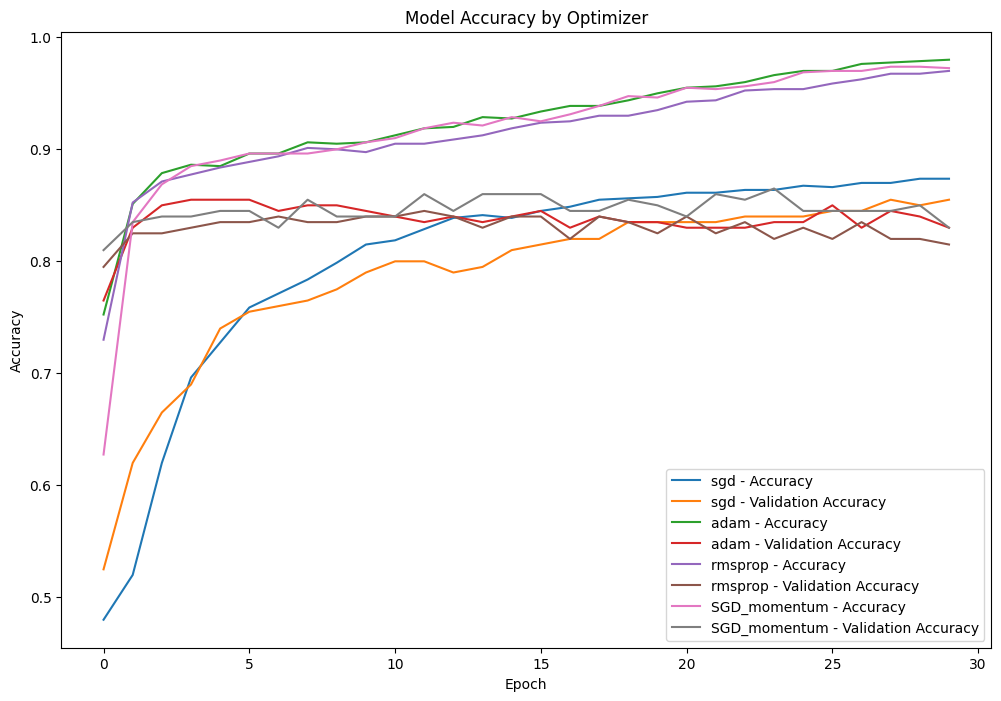

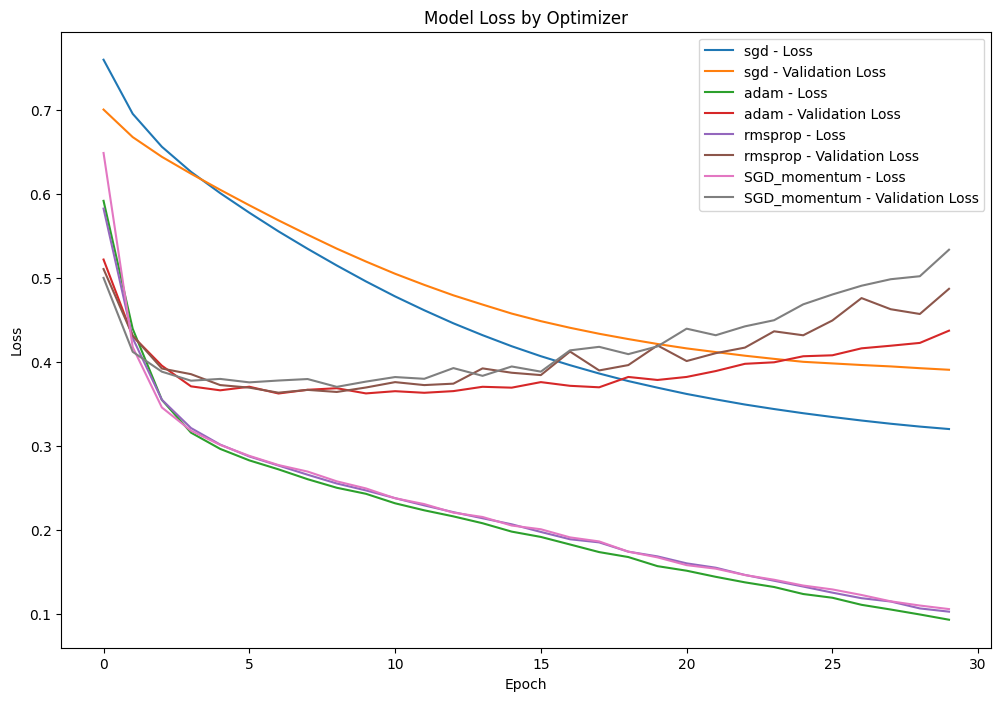

In [50]:
plt.figure(figsize=(12, 8))

for opt, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{opt} - Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{opt} - Validation Accuracy')

plt.title('Model Accuracy by Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


plt.figure(figsize=(12, 8))

for opt, history in histories.items():
    plt.plot(history.history['loss'], label=f'{opt} - Loss')
    plt.plot(history.history['val_loss'], label=f'{opt} - Validation Loss')

plt.title('Model Loss by Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Analysis and Questions
* Which optimizer provided the fastest convergence?
* Which optimizer achieved the highest accuracy on the validation set?
* Discuss the possible reasons behind the performance differences observed.


# Part 2: Regression task
Now, let's apply the same set of optimizers to a regression problem.

## Setup for Regression
Import libraries and prepare a regression dataset. For simplicity, let's use a synthetic dataset.

In [ ]:
from sklearn.datasets import make_regression

# Generate synthetic data for regression
X_reg, y_reg = make_regression(n_samples=500, n_features=2, noise=15, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


## Define the Neural Network Model for Regression
Create a function to build a neural network model suitable for regression. Use 2 hidden layeres of 10 nodes each both using relu activations. Dont forget the output layer. For regression it is recommended to use MSE as loss and metric.

In [ ]:
def build_model_regression(optimizer):
    # -- Define the model yourself here following the instuctions above.
    model = 
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model


## Experiment with Different Optimizers for Regression
Repeat the same process as in the classification task, but now for regression.


In [ ]:
history_dict_reg = {}

for opt in optimizers:
    print(f"Training (Regression) with optimizer: {opt}")
    if opt=="SGD_momentum": 
        model = build_model_regression(tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9))
    else:
        model = build_model_regression(opt)
    history = model.fit(X_train_reg, y_train_reg, epochs=100, validation_split=0.2, verbose=0)
    history_dict_reg[opt] = history

    # Evaluate the model
    test_loss, test_mse = model.evaluate(X_test_reg, y_test_reg, verbose=0)
    print(f"Test MSE with {opt}: {test_mse:.4f}\n")


## Visualization of Results for Regression
Plot the training and validation loss (MSE) for each optimizer.

In [ ]:
plt.figure(figsize=(12, 8))
for opt, history in history_dict_reg.items():
    plt.plot(history.history['mse'], label=f'{opt} - Train (Reg)')
    plt.plot(history.history['val_mse'], label=f'{opt} - Val (Reg)')

plt.title('Model MSE with Different Optimizers (Regression)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Analysis and Questions
* Compare the performance of the optimizers between the classification and regression tasks.
* Did certain optimizers perform better on one task than the other? Why might this be?
* Discuss the implications of these findings for selecting optimizers in real-world applications.

## Conclusion
Reflect on the importance of understanding the strengths and limitations of different optimizers in relation to the specific nature of the problem and dataset.